In [660]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [2]:
#Gene expression data
data = pd.read_csv("../../data/gene_expression_clinical.csv",index_col=0)

In [3]:
#Remove non-relavant columns
data.drop(data.columns[[60483,60484,60485,60486,60488,60489,60490,60491,60492,60493,60494,60495]],axis=1,inplace=True)
data.head()

,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000264510.4,ENSGR0000264819.4,ENSGR0000265658.4,ENSGR0000270726.4,ENSGR0000275287.3,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,sample_type
X15a44c9d.7c84.4170.96a1.358dd796aa65.htseq.counts,4219,4,1070,565,133,1493,54514,2894,6042,867,...,0,0,0,0,0,0,0,0,0,0
X160aee04.df36.4e94.90c5.b01b2991ba48.htseq.counts,3428,5,821,502,537,278,103347,2307,4815,486,...,0,0,0,0,0,0,0,0,0,0
X1d86dc66.1a62.4cbc.9973.ae63ab754d6a.htseq.counts,5284,7,1403,704,119,629,98287,3840,7077,673,...,0,0,0,0,0,0,0,0,0,0
X2b8bf629.3c22.4dcb.a9a5.ec01c5099167.htseq.counts,3236,0,697,643,56,200,39678,1685,5872,477,...,0,0,0,0,0,0,0,0,0,0
X2cc2e3ce.68cd.4690.9fff.5ecf86c2f57a.htseq.counts,3051,11,984,353,70,387,36361,2870,4070,586,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Principle component analysis
from sklearn.decomposition import PCA

In [325]:
y = np.zeros((data.shape[0],2))
y[:,0] = data['sample_type'].values
y[:,1] = [1 if x==0 else 0 for x in y[:,0]]
Y = y
#Zero in the first field is benign, and zero in the second field is malignant
Y

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [643]:
pca = PCA(n_components=20) #Make a PCA object with n = 15 PCs
pca.fit(data.drop(['sample_type'],axis=1))

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [644]:
pc = pca.transform(data.drop(['sample_type'],axis=1))
pc.shape

(1114, 20)

In [645]:
#Shuffle the data set
X,Y = shuffle(pc,Y,random_state=1)

In [646]:
#Convert the dataset into train and test set
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.30, random_state=415)

In [647]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(779, 20)
(779, 2)
(335, 20)


In [686]:
allowed_optimizers = ['gd']
#Add leaky relu
allowed_activations = ['sigmoid', 'tanh', 'softmax', 'relu', 'linear']
allowed_losses = ['rmse', 'cross_entropy']

class ModularNeuralNet:
    """
    Modular deep artificial neural network implemented in a sklearn style
    """
    
    #Class assertions
    def assertions(self):
        global allowed_optimizers, allowed_activations, allowed_losses
        assert self.loss in allowed_losses, 'Invalid loss function given'
        assert self.optimizer in allowed_optimizers, 'Invalid optimizer given'
        assert len(self.activations) == self.hidden_layers, 'Number of activation functions must equal the number of hidden layers'
        assert all(x in allowed_activations for x in self.activations), 'Invalid activation function used'
        assert self.epochs > 0, 'Number of epochs must be greater than 0'
        assert self.input_dim > 0, 'Number of input nodes must be greater than 0'
    
    def __init__(self, input_dim = 15,n_class=2,hidden_nodes=[16,16,16,16],lr=0.1,epochs=10,
                activations=['relu','relu','relu','sigmoid'],loss='cross_entropy',plots=False,
                optimizer='gd',batch_size=100, save_step=1,graph=False,save_model=False,
                print_iters=True, print_final=False):
        
        self.n_class = n_class
        self.hidden_nodes = hidden_nodes
        self.hidden_layers = len(self.hidden_nodes)
        self.input_dim = input_dim       
        self.lr = lr
        self.epochs = epochs
        self.activations = activations
        self.loss = loss
        self.optimizer = optimizer
        self.batch_size = batch_size
        self.save_step = save_step
        self.print_iters = print_iters
        self.print_final = print_final
        self.graph = graph
        self.save_model = save_model
        self.plots = plots
        self.assertions()

        self.model_path = os.path.join(os.getcwd(),"model\\")
        self.graph_path = os.path.join(os.getcwd(),"graph\\")
        self.cost_history = []
        self.mse_history = []
        self.accuracy_history = []
        self.weights_dim = [self.input_dim] + self.hidden_nodes
        self.weights = []
        self.biases = []
        
    #Fit takes training input data and trains a neural network with user specified infrastructure
    def fit(self, train_x, train_y):
        '''
        :param x: m x p dataframe
        :return: trained weights and bias for the sdae       
        '''
        
        tf.reset_default_graph()
        
        #Generate tensorflow variables for the weights and biases
        weights = self.weight()
        biases = self.bias()
        
        x = tf.placeholder(dtype=tf.float32,shape=[None, self.input_dim])
        W = tf.Variable(tf.zeros([self.input_dim, self.n_class]))
        b = tf.Variable(tf.zeros([self.n_class]))
        y_ = tf.placeholder(dtype=tf.float32,shape=[None,self.n_class])
        y = tf.placeholder(dtype=tf.float32,shape=[None,self.n_class])
        
        #Initialize variables
        init = tf.global_variables_initializer()
        
        #Initialize saver classes
        saver = tf.train.Saver()
        
        #Call the defined model
        y = self.mlp(x,weights,biases)

        #Define the cost function and optimizer
        cost_function = self.cost(self.loss, y, y_)
        training_step = self.optimizers(self.lr,cost_function)
        
        #Define equations for correct prediction and accuracy
        correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        
        #Initialize tensorflow session
        sess = tf.Session()
        sess.run(init)
        
        for epoch in range(self.epochs):
            sess.run(training_step, feed_dict={x:train_x, y_:train_y})
            
            #Store subset of training cost and accuracy
            if (epoch + 1) % self.save_step == 0:
                
                #Current training cost
                cost = sess.run(cost_function, feed_dict={x:train_x,y_:train_y})
                self.cost_history.append(cost)

                #Current test set MSE, move to transform method
                #pred_y = sess.run(y,feed_dict={x:test_x})
                #mse = tf.reduce_mean(tf.square(pred_y - test_y))
                #mse_ = sess.run(mse)
                #self.mse_history.append(mse_)

                #Current training accuracy
                accuracy_ = (sess.run(accuracy, feed_dict={x:train_x,y_:train_y}))
                self.accuracy_history.append(accuracy_)
                
                #Print iterations based on class specification
                if self.print_iters:
                    print('epoch : ', epoch, ' - ', 'cost: ', cost, ' - ', 'accuracy: ', accuracy_)
            
        #Save weights and biases
        self.weights = sess.run(weights)
        self.biases = sess.run(biases)
            
        #Save tensorflow graph based on class specification 
        if self.graph:
            File_Writer = tf.summary.FileWriter(self.graph_path, sess.graph)
            print('Tensorboard graph saved to: ', self.graph_path)
        
        if self.save_model:
            save_path = saver.save(sess,self.model_path)
            print("Model saved in file: %s" % save_path)
            
        #Plot cost and training accuracy on class specification
        if self.plots:
            self.train_plots()
            
        if self.print_final:
            #print the final cost
            print('Final Cost: ', sess.run(cost_function, feed_dict={x:train_x, y_:train_y}))

            #Print the final training accuracy
            print("Final Training Accuracy: ", (sess.run(accuracy, feed_dict={x:train_x, y_:train_y})))
        
        return
    
    def predict(self, data):
        """
        :param x: m x p dataframe
        :return: probability of predicted class for each example
        """
        tf.reset_default_graph()
    
        #Generate tensorflow variables for the weights and biases
        _weights = self._weight(self.weights)
        _biases = self._bias(self.biases)
        
        #Initialize variables
        _x = tf.constant(data, dtype=tf.float32)  
        
        #Call the defined model
        y = self.mlp(_x,_weights,_biases)

        sess = tf.Session()
        pred_y = sess.run(self.activate(y,'softmax'))
        
        return pred_y
    
    def score(self, x, y):
        '''
        :param x: m x p data and m x class one hot encoded labels
        :return: returns the accuracy, adjusted rand index, precision, recall,
        and confusion matrix in an array
        '''
        
        pred_y = np.argmax(self.predict(x),axis=1)
        true_y = np.argmax(y,axis=1)
    
        return [accuracy_score(true_y,pred_y),adjusted_rand_score(true_y,pred_y),
                precision_score(true_y,pred_y),recall_score(true_y,pred_y),
               confusion_matrix(true_y,pred_y)]

    #Implements the desired cost function
    def cost(self,loss, y, y_):
        if loss == 'rmse':
            return tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(y_, y))))
        elif loss == 'cross_entropy':
            #Removed tf.reduce_mean
            return tf.losses.softmax_cross_entropy(logits=y,onehot_labels=y_)
    
    #Implements the desired cost function
    def optimizers(self, lr, loss):
        if self.optimizer == 'gd':
            return tf.train.GradientDescentOptimizer(lr).minimize(loss)
        
        elif self.optimizer == 'adam':
            return tf.train.AdamOptimizer(lr).minimize(loss)
    
    #Implements the desired activation function
    def activate(self, linear, name):
        if name == 'sigmoid':
            return tf.nn.sigmoid(linear, name='layer')
        elif name == 'softmax':
            return tf.nn.softmax(linear, name='layer')
        elif name == 'linear':
            return linear
        elif name == 'tanh':
            return tf.nn.tanh(linear, name='layer')
        elif name == 'relu':
            return tf.nn.relu(linear, name='layer')
        
    def weight(self):
        weights = {'out':tf.Variable(tf.truncated_normal([self.weights_dim[-1],self.n_class]),
                                     dtype=tf.float32)}
        for i in range(self.hidden_layers):
            var = 'h'+str(i)
            weights[var] = tf.Variable(tf.truncated_normal([self.weights_dim[i],self.weights_dim[i+1]]),
                                      dtype=tf.float32)
        return weights
    
    def bias(self):
        biases = {'out':tf.Variable(tf.truncated_normal([self.n_class]),
                                   dtype=tf.float32)}
        for i in range(self.hidden_layers):
            var = var = 'b'+str(i)
            biases[var] = tf.Variable(tf.truncated_normal([self.hidden_nodes[i]]),
                                     dtype=tf.float32)
        return biases
    
    def _weight(self, weight):
        weights = {'out':tf.constant(weight['out'], dtype=tf.float32)}
        for i in range(self.hidden_layers):
            var = 'h'+str(i)
            weights[var] = tf.constant(weight[var], dtype=tf.float32)
        return weights
    
    def _bias(self, bias):
        biases = {'out':tf.constant(bias['out'], dtype=tf.float32)}
        for i in range(self.hidden_layers):
            var = var = 'b'+str(i)
            biases[var] = tf.constant(bias[var], dtype=tf.float32)
        return biases
    
    #Define the multiple layer perceptron model
    def mlp(self, x, weights, biases):

        layer = x
        #Hidden Layers
        for i in range(self.hidden_layers):
            layer = tf.add(tf.matmul(layer,weights['h'+str(i)]),biases['b'+str(i)])
            layer = self.activate(layer,self.activations[i])
            
        #Output Layer
        out_layer = tf.add(tf.matmul(layer, weights['out']), biases['out'])
        
        return out_layer
    
    def train_plots(self):
        #Plot the cost 
        plt.plot(self.cost_history,'r')
        plt.title('Training Cost History')
        plt.show()
        
        #Plot the training accuracy
        plt.plot(self.accuracy_history,'b')
        plt.title('Training Accuracy')
        plt.show()
        
    def test_plots(self):
        return ""

In [704]:
#Initiate class
model = ModularNeuralNet(hidden_nodes=[25,25,25,25],activations=['tanh','relu','relu','sigmoid'],
                         lr=0.1,graph=False,save_model=False,plots=True,epochs=10000,print_iters=False,
                         save_step=5,print_final=True,input_dim=20)

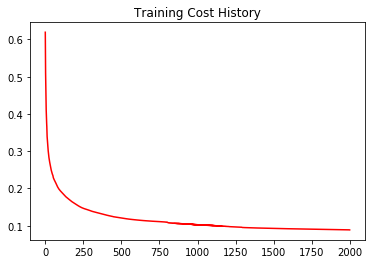

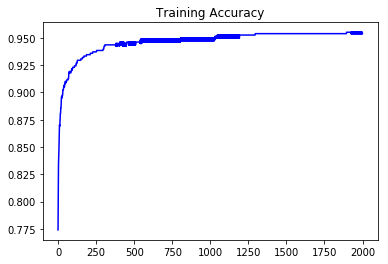

Final Cost:  0.0886049
Final Training Accuracy:  0.953787


In [705]:
#Fit to training data
model.fit(train_x, train_y)

In [706]:
#Classification agreement of test set
model.predict(train_x)

array([[  5.41387916e-01,   4.58612025e-01],
       [  6.59857571e-01,   3.40142399e-01],
       [  9.91419315e-01,   8.58070981e-03],
       ..., 
       [  2.36638337e-01,   7.63361633e-01],
       [  9.99496222e-01,   5.03740157e-04],
       [  9.73316371e-01,   2.66835839e-02]], dtype=float32)

In [707]:
model.score(train_x,train_y)

[0.95378690629011553,
 0.78587805410261691,
 0.9296875,
 0.81506849315068497,
 array([[624,   9],
        [ 27, 119]], dtype=int64)]